In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [109]:
blog_data=pd.read_csv("/content/drive/MyDrive/blogtext.csv")
blog_data.head(2)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...


In [110]:
backup_data=blog_data.copy()
backup_data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [111]:
blog_data.shape

(681284, 7)

In [112]:
blog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [113]:
blog_data.id.unique().size

19320

In [114]:
blog_data.gender.value_counts()

male      345193
female    336091
Name: gender, dtype: int64

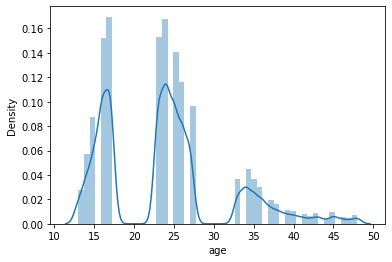

In [115]:
sns.distplot(blog_data["age"])

In [116]:
blog_data.topic.value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [117]:
blog_data.sign.value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

In [118]:
blog_data.drop(columns=["date","id"],inplace=True)

In [119]:
blog_data.head()

,gender,age,topic,sign,text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...


In [120]:
blog_data.describe(include="all")

,gender,age,topic,sign,text
count,681284,681284.000000,681284,681284,681284
unique,2,NaN,40,12,611652
top,male,NaN,indUnk,Cancer,urlLink
freq,345193,NaN,251015,65048,445
mean,NaN,23.932326,NaN,NaN,NaN
std,NaN,7.786009,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN
25%,NaN,17.000000,NaN,NaN,NaN
50%,NaN,24.000000,NaN,NaN,NaN
75%,NaN,26.000000,NaN,NaN,NaN


In [121]:
# def age_mapping(x):
#   if (x>=13 and x<=17):
#     return 1
#   if (x>=23 and x<=27):
#     return 2
#   if (x>=33 and x<=47):
#     return 3

In [122]:
# blog_data["age"].map(age_mapping).value_counts().plot(kind="bar")

In [123]:
# blog_data["age"]=blog_data["age"].map(age_mapping)

In [124]:
# blog_data.head()

In [125]:
blog_data['text'] = blog_data['text'].astype('str')
blog_data['transformed_text'] = blog_data['text'].apply(lambda x: x.lower())
blog_data.head()

,gender,age,topic,sign,text,transformed_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...","info has been found (+/- 100 pages,..."
1,male,15,Student,Leo,These are the team members: Drewe...,these are the team members: drewe...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!,testing!!! testing!!!
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoo!'s toolbar i can ...


In [126]:
blog_data["transformed_text"]=blog_data["transformed_text"].str.replace('[^\w\s]','')
blog_data.head()

,gender,age,topic,sign,text,transformed_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info has been found 100 pages and ...
1,male,15,Student,Leo,These are the team members: Drewe...,these are the team members drewes...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoos toolbar i can no...


In [127]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
stop

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [128]:
blog_data['transformed_text'] = blog_data['transformed_text'].apply(lambda words: ' '.join(word for word in words.split() if word not in stop))

In [129]:
blog_data.head()

,gender,age,topic,sign,text,transformed_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoos toolbar capture urls popupswhich...


In [130]:
import nltk
nltk.download('wordnet')
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [131]:
def lemmatize_text(text):
  return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

In [132]:
blog_data['transformed_text'] = blog_data['transformed_text'].apply(lemmatize_text)
blog_data.head()

,gender,age,topic,sign,text,transformed_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found 100 page 45 mb pdf file wait untill...
1,male,15,Student,Leo,These are the team members: Drewe...,team member drewes van der laag urllink mail r...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture url popupswhich m...


In [133]:
# from sklearn.preprocessing import LabelEncoder
# encode=LabelEncoder()
# columns=["gender","topic","sign"]
# for i in columns:
#   blog_data[i]=encode.fit_transform(pd.DataFrame(blog_data[i]))
# blog_data.head()

In [134]:
blog_data['labels']=blog_data.apply(lambda col: [col['gender'],str(col['age']),col['topic'],col['sign']], axis=1)
blog_data.head()

,gender,age,topic,sign,text,transformed_text,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found 100 page 45 mb pdf file wait untill...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team member drewes van der laag urllink mail r...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture url popupswhich m...,"[male, 33, InvestmentBanking, Aquarius]"


In [135]:
data=blog_data[['transformed_text','labels']]
data.head()

,transformed_text,labels
0,info found 100 page 45 mb pdf file wait untill...,"[male, 15, Student, Leo]"
1,team member drewes van der laag urllink mail r...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture url popupswhich m...,"[male, 33, InvestmentBanking, Aquarius]"


In [170]:
data = data.iloc[:5000]
data

,transformed_text,labels
0,info found 100 page 45 mb pdf file wait untill...,"[male, 15, Student, Leo]"
1,team member drewes van der laag urllink mail r...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoo toolbar capture url popupswhich m...,"[male, 33, InvestmentBanking, Aquarius]"
...,...,...
4995,another one dream last night except time least...,"[female, 17, indUnk, Scorpio]"
4996,mmm strawberry tea breakfast tomorrow think de...,"[female, 17, indUnk, Scorpio]"
4997,yay new layout yeah know need get complicated ...,"[female, 17, indUnk, Scorpio]"
4998,ok lied fed isnt playing friday night underdog...,"[female, 17, indUnk, Scorpio]"


In [239]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

In [240]:
transformed_text = tfidf_vectorizer.fit_transform(data['transformed_text'])

In [241]:
transformed_text

<5000x336322 sparse matrix of type '<class 'numpy.float64'>'
	with 672374 stored elements in Compressed Sparse Row format>

In [242]:
y=data["labels"]
y

0                      [male, 15, Student, Leo]
1                      [male, 15, Student, Leo]
2                      [male, 15, Student, Leo]
3                      [male, 15, Student, Leo]
4       [male, 33, InvestmentBanking, Aquarius]
                         ...                   
4995              [female, 17, indUnk, Scorpio]
4996              [female, 17, indUnk, Scorpio]
4997              [female, 17, indUnk, Scorpio]
4998              [female, 17, indUnk, Scorpio]
4999              [female, 17, indUnk, Scorpio]
Name: labels, Length: 5000, dtype: object

In [243]:
label_counts=dict()

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label]+=1
        else:
            label_counts[label]=1

label_counts

{'14': 170,
 '15': 339,
 '16': 67,
 '17': 331,
 '23': 137,
 '24': 353,
 '25': 268,
 '26': 96,
 '27': 86,
 '33': 101,
 '34': 540,
 '35': 2307,
 '36': 60,
 '37': 19,
 '39': 79,
 '41': 14,
 '42': 9,
 '44': 3,
 '45': 14,
 '46': 7,
 'Accounting': 2,
 'Aquarius': 329,
 'Aries': 2483,
 'Arts': 31,
 'Automotive': 14,
 'Banking': 16,
 'BusinessServices': 87,
 'Cancer': 94,
 'Capricorn': 84,
 'Communications-Media': 61,
 'Consulting': 16,
 'Education': 118,
 'Engineering': 119,
 'Gemini': 86,
 'Internet': 20,
 'InvestmentBanking': 70,
 'Law': 3,
 'Leo': 190,
 'Libra': 414,
 'Museums-Libraries': 2,
 'Non-Profit': 47,
 'Pisces': 67,
 'Religion': 4,
 'Sagittarius': 704,
 'Science': 33,
 'Scorpio': 408,
 'Sports-Recreation': 75,
 'Student': 569,
 'Taurus': 100,
 'Technology': 2332,
 'Virgo': 41,
 'female': 1706,
 'indUnk': 1381,
 'male': 3294}

In [244]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [245]:
binarizer

MultiLabelBinarizer(classes=['14', '15', '16', '17', '23', '24', '25', '26',
                             '27', '33', '34', '35', '36', '37', '39', '41',
                             '42', '44', '45', '46', 'Accounting', 'Aquarius',
                             'Aries', 'Arts', 'Automotive', 'Banking',
                             'BusinessServices', 'Cancer', 'Capricorn',
                             'Communications-Media', ...],
                    sparse_output=False)

In [246]:
Y=binarizer.fit_transform(data.labels)
Y

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [247]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(transformed_text,Y,test_size=0.2)

In [248]:
Xtrain.shape

(4000, 336322)

In [249]:
Ytrain.shape

(4000, 54)

In [250]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [251]:
model=LogisticRegression(solver='lbfgs')

In [252]:
model=OneVsRestClassifier(model)

In [253]:
model.fit(Xtrain,Ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [254]:
Ypred=model.predict(Xtest)

In [255]:
Ypred

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [256]:
Ypred[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [257]:
Ytest[0]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [258]:
from sklearn.metrics import accuracy_score,f1_score,average_precision_score,recall_score,hamming_loss,confusion_matrix,classification_report

def print_evaluation_scores(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: ', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: ', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: ', recall_score(Ytest, Ypred, average='micro'))
    print('Hamming Loss: ', hamming_loss(Ytest, Ypred))
    

In [259]:
print_evaluation_scores(Ytest, Ypred)

Accuracy score:  0.398
F1 score:  0.630921553693831
Average precision score:  0.45375740740740744
Average recall score:  0.51775
Hamming Loss:  0.04487037037037037


In [260]:
print(classification_report(Ytest, Ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        73
           4       0.00      0.00      0.00        32
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        57
           7       0.00      0.00      0.00        20
           8       0.00      0.00      0.00        18
           9       0.00      0.00      0.00        21
          10       0.88      0.06      0.12       110
          11       0.82      0.85      0.83       463
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00        14
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00    

In [261]:
model.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [262]:
def getPredictedClasses(x):
  label = []
  i = 0
  for val in Ypred[x]:
    #print(val)
    if val == 1:
      label.append(binarizer.classes_[i])
      #print(model.classes_[i])
    i = i + 1
  return label

In [263]:
def getActualClasses(x):
  label = []
  i = 0
  for val in Ytest[x]:
    #print(val)
    if val == 1:
      label.append(binarizer.classes_[i])
      #print(model.classes_[i])
    i = i + 1
  return label

In [264]:
getPredictedClasses(0)

['male']

In [265]:
for i in range(20,35):
  print("Actual::",getActualClasses(i))
  print("Predicted::",getPredictedClasses(i),"\n")

Actual:: ['16', 'Libra', 'Student', 'female']
Predicted:: ['male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['25', 'Taurus', 'indUnk', 'male']
Predicted:: ['female', 'indUnk'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['26', 'Gemini', 'indUnk', 'male']
Predicted:: ['Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Ar

In [266]:
from xgboost import XGBClassifier

In [267]:
xgbmodel=XGBClassifier()

In [270]:
xgbmodel=OneVsRestClassifier(xgbmodel)

In [271]:
xgbmodel.fit(Xtrain,Ytrain)

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            learning_rate=0.1, max_delta_step=0,
                                            max_depth=3, min_child_weight=1,
                                            missing=None, n_estimators=100,
                                            n_jobs=1, nthread=None,
                                            objective='binary:logistic',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None, subsample=1,
                                            verbosity=1),
                    n_jobs=None)

In [275]:
Ypred=xgbmodel.predict(Xtest)

In [276]:
print_evaluation_scores(Ytest, Ypred)

Accuracy score:  0.52
F1 score:  0.7185258123505416
Average precision score:  0.5512965941174368
Average recall score:  0.6385
Hamming Loss:  0.03705555555555556


In [277]:
for i in range(20,35):
  print("Actual::",getActualClasses(i))
  print("Predicted::",getPredictedClasses(i),"\n")

Actual:: ['16', 'Libra', 'Student', 'female']
Predicted:: ['male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['25', 'Taurus', 'indUnk', 'male']
Predicted:: ['Taurus', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['26', 'Gemini', 'indUnk', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male'] 

Actual:: ['35', 'Aries', 'Technology', 'male']
Predicted:: ['35', 'Aries', 'Technology', 'male